In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# read data
df_test = pd.read_csv("test.csv", index_col = "Loan_ID")
df_train = pd.read_csv("train.csv", index_col = "Loan_ID")

In [3]:
# take a look at the data
df_train

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Loan_ID,,,,,,,,,,,,
LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y


In [4]:
# check for missing values
df_train.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [5]:
# impute the missing values with mode for categorical values
df_train["Gender"] = df_train["Gender"].fillna(df_train["Gender"].mode()[0])
df_train['Married'] = df_train['Married'].fillna(df_train['Married'].mode()[0])
df_train['Dependents'] = df_train['Dependents'].fillna(df_train['Dependents'].mode()[0])
df_train['Self_Employed'] = df_train['Self_Employed'].fillna(df_train['Self_Employed'].mode()[0])

In [6]:
# impute the missing values with mean for numerical values
df_train["LoanAmount"] = df_train["LoanAmount"].fillna(df_train["LoanAmount"].mode()[0])
df_train["Loan_Amount_Term"] = df_train["Loan_Amount_Term"].fillna(df_train["Loan_Amount_Term"].mode()[0])
df_train["Credit_History"] = df_train["Credit_History"].fillna(df_train["Credit_History"].mode()[0])


In [7]:
# check if all the missing values have been filled
df_train.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [8]:
# One-Hot-Encoding for categorical values
df_gender = pd.get_dummies(df_train['Gender'], prefix ="Gender")
df_married = pd.get_dummies(df_train['Married'], prefix = "Married")
df_dependents = pd.get_dummies(df_train['Dependents'], prefix = "Dependents")
df_education = pd.get_dummies(df_train['Education'], prefix = "Education")
df_self_employed = pd.get_dummies(df_train['Self_Employed'], prefix = "Self_Employed")
df_credit_history = pd.get_dummies(df_train['Credit_History'], prefix = "Credit_History")
df_property_area = pd.get_dummies(df_train['Property_Area'], prefix = "Property_Area")
df_education

,Education_Graduate,Education_Not Graduate
Loan_ID,,
LP001002,1,0
LP001003,1,0
LP001005,1,0
LP001006,0,1
LP001008,1,0
...,...,...
LP002978,1,0
LP002979,1,0
LP002983,1,0


In [9]:
# create a df_features table for selecting features
# copy the gender attribute for a start
df_features = df_gender.copy()
df_features.info()

<class 'pandas.core.frame.DataFrame'>
Index: 614 entries, LP001002 to LP002990
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Gender_Female  614 non-null    uint8
 1   Gender_Male    614 non-null    uint8
dtypes: uint8(2)
memory usage: 6.0+ KB


In [10]:
# add the one hot encoded features to the df_features
df_features = df_features.join([df_married, df_dependents, df_education, df_self_employed, 
                                df_credit_history, df_property_area])
df_features

,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Credit_History_0.0,Credit_History_1.0,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
Loan_ID,,,,,,,,,,,,,,,,,
LP001002,0,1,1,0,1,0,0,0,1,0,1,0,0,1,0,0,1
LP001003,0,1,0,1,0,1,0,0,1,0,1,0,0,1,1,0,0
LP001005,0,1,0,1,1,0,0,0,1,0,0,1,0,1,0,0,1
LP001006,0,1,0,1,1,0,0,0,0,1,1,0,0,1,0,0,1
LP001008,0,1,1,0,1,0,0,0,1,0,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
LP002978,1,0,1,0,1,0,0,0,1,0,1,0,0,1,1,0,0
LP002979,0,1,0,1,0,0,0,1,1,0,1,0,0,1,1,0,0
LP002983,0,1,0,1,0,1,0,0,1,0,1,0,0,1,0,0,1


<AxesSubplot:xlabel='Loan_Amount_Term', ylabel='Count'>

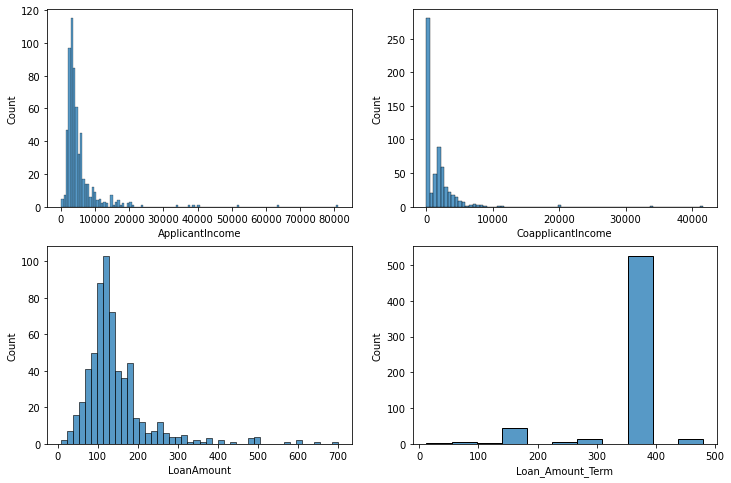

In [11]:
# plot the features to check the distribution
fig, ax = plt.subplots(nrows = 2, ncols = 2, figsize = (12,8))
sns.histplot(ax = ax[0,0], data= df_train.ApplicantIncome)
sns.histplot(ax = ax[0,1], data= df_train.CoapplicantIncome)
sns.histplot(ax = ax[1,0], data= df_train.LoanAmount)
sns.histplot(ax = ax[1,1], data= df_train.Loan_Amount_Term)

In [12]:
# # apply log transformation to the skewed features
# applicant_income_log = df_train.ApplicantIncome.apply(np.log)
# coapplicant_income_log = df_train.CoapplicantIncome.apply(np.log)
# loan_amount_log = df_train.LoanAmount.apply(np.log)

In [13]:
# # plot the features to see that they are now normally distributed
# fig, ax = plt.subplots(nrows = 2, ncols = 2, figsize = (12,8))
# sns.histplot(ax = ax[0,0], data= applicant_income_log)
# sns.histplot(ax = ax[0,1], data= coapplicant_income_log)
# sns.histplot(ax = ax[1,0], data= loan_amount_log)


In [14]:
# # error with scaling for coapplicant, turns out due to log transformation due to 0 income of coapplicants
# print(len(np.where(df_train.CoapplicantIncome == 0)[0]))

# # log trasnform and replace -inf with nan to deal with inf
# df_train.CoapplicantIncome = df_train.CoapplicantIncome.apply(np.log).replace(-np.inf, np.nan)
# df_train.CoapplicantIncome

In [15]:
# applied cube root transformation since we were getting -inf for log transformation of coapplicant income,
# which stopped us from doing a standardization on the feature
from sklearn.preprocessing import StandardScaler

df_features['ApplicantIncome'] = StandardScaler().fit_transform(pd.DataFrame(df_train['ApplicantIncome'].apply(np.cbrt)))
df_features['CoapplicantIncome'] = StandardScaler().fit_transform(pd.DataFrame(df_train['CoapplicantIncome'].apply(np.cbrt)))
df_features['LoanAmount'] = StandardScaler().fit_transform(pd.DataFrame(df_train['LoanAmount'].apply(np.cbrt)))


<AxesSubplot:xlabel='LoanAmount', ylabel='Count'>

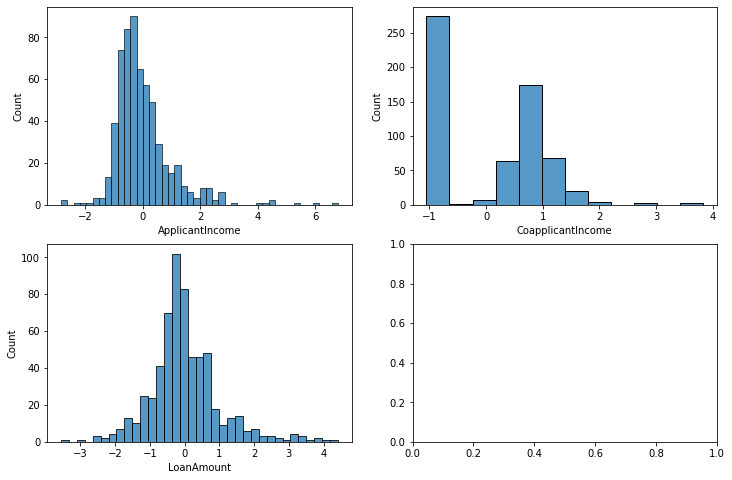

In [16]:
fig, ax = plt.subplots(nrows = 2, ncols = 2, figsize = (12,8))
sns.histplot(ax = ax[0,0], data= df_features.ApplicantIncome)
sns.histplot(ax = ax[0,1], data= df_features.CoapplicantIncome)
sns.histplot(ax = ax[1,0], data= df_features.LoanAmount)

In [17]:
# add the loan_amount_term column to the features table
df_features = df_features.join([df_train.Loan_Amount_Term])

In [18]:
# check df_features
df_features

,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,...,Self_Employed_Yes,Credit_History_0.0,Credit_History_1.0,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term
Loan_ID,,,,,,,,,,,,,,,,,,,,,
LP001002,0,1,1,0,1,0,0,0,1,0,...,0,0,1,0,0,1,0.380325,-1.053225,-0.212056,360.0
LP001003,0,1,0,1,0,1,0,0,1,0,...,0,0,1,1,0,0,0.022870,0.561256,-0.086543,360.0
LP001005,0,1,0,1,1,0,0,0,1,0,...,1,0,1,0,0,1,-0.533028,-1.053225,-1.254900,360.0
LP001006,0,1,0,1,1,0,0,0,0,1,...,0,0,1,0,0,1,-0.711341,0.820678,-0.212056,360.0
LP001008,0,1,1,0,1,0,0,0,1,0,...,0,0,1,0,0,1,0.419383,-1.053225,0.106705,360.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
LP002978,1,0,1,0,1,0,0,0,1,0,...,0,0,1,1,0,0,-0.574203,-1.053225,-1.138377,360.0
LP002979,0,1,0,1,0,0,0,1,1,0,...,0,0,1,1,0,0,-0.128936,-1.053225,-1.981918,180.0
LP002983,0,1,0,1,0,1,0,0,1,0,...,0,0,1,0,0,1,0.899211,-0.178302,1.417159,360.0


In [19]:
# split data into train and test datasets
y = (df_train.Loan_Status == "Y").astype(int)

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df_features, y, test_size = 0.20, stratify=y, random_state =1)

# check the shape of the X_train set
X_train.shape

(491, 21)

In [20]:
# import random forest classifier and train the model
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators = 100,
                             random_state = 1,
                             n_jobs = -1)

rfc.fit(X_train, y_train)
rfc.score(X_test, y_test)

feature_names = df_features.columns.values

# test the importance of the features and sort them by their values
df_feature_importance = pd.DataFrame()
df_feature_importance['Feature'] = feature_names
df_feature_importance["Importance"] = rfc.feature_importances_
df_feature_importance.sort_values(by="Importance", ascending=False)

,Feature,Importance
17,ApplicantIncome,0.189796
19,LoanAmount,0.170515
13,Credit_History_1.0,0.139410
12,Credit_History_0.0,0.117120
18,CoapplicantIncome,0.108060
20,Loan_Amount_Term,0.040259
15,Property_Area_Semiurban,0.024636
14,Property_Area_Rural,0.017824
4,Dependents_0,0.017302
5,Dependents_1,0.017296


In [21]:
# use feature_selection to get the important features
from sklearn.feature_selection import SelectFromModel
sfm = SelectFromModel(rfc, prefit=True)
feature_names[sfm.get_support()]

array(['Credit_History_0.0', 'Credit_History_1.0', 'ApplicantIncome',
       'CoapplicantIncome', 'LoanAmount'], dtype=object)

In [22]:
# create a new table X_train_fs with the selected features
X_train_fs = sfm.transform(X_train)
X_test_fs = sfm.transform(X_test)
X_train_fs.shape

/Users/matthewlim/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/Users/matthewlim/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


(491, 5)

In [23]:
# train the model with the selected features and check the f1 score
rfc_fs = RandomForestClassifier(n_estimators = 100, n_jobs = -1)
rfc_fs.fit(X_train_fs, y_train)

from sklearn.metrics import f1_score

f1_score(y_test, rfc_fs.predict(X_test_fs))

0.8913043478260869